Web apps are great for allowing the public to access and interact with programs that you create.

In this tutorial, we will be using Flask to create a simple message bank that allows the user to submit a message and view messages that other people have submitted.

Here's the link to my project repository for the full code: [https://github.com/roberttran1/FlaskApp](https://github.com/roberttran1/FlaskApp)

The first step is to add our import statements and define a `main()` function that will render our homepage. For the homepage, I have created a file called `base.html` that contains the HTML code to format the page.

In [ ]:
from flask import Flask
from flask import render_template, abort, redirect, url_for
from flask import request, g
import sqlite3

app = Flask(__name__)

@app.route("/")
def main():
    return render_template("base.html") # renders homepage

The template file `base.html` is shown below. On the second line, we link the file to the CSS file that formats the text. Then, we define the title and any other text on the page. The "Submit a message" and "View messages" text is hyperlinked so that the user can click on it to perform the function that is stated. Finally, there is a `{% block content %}` at the end so that the submission and view pages can add their own content to this base template.

In [ ]:
<!doctype html>
<link rel="stylesheet" href="{{ url_for('static', filename='style.css') }}">
    <title> A Simple Message Bank </title>
    <h1> A Simple Message Bank </h1>
    <a href="/submit/"> Submit a message </a>
    <br>
    <a href="/view/"> View messages </a>

{% block content %} {% endblock %}

Next, we will define the function for the page handling the submissions. This function will use the methods "POST" and "GET." If either method is called, the function will render `submit.html`. When "POST" is called, the function will also create a database if one does not already exist and insert the message that the user submitted into the database.

In [ ]:
@app.route("/submit/", methods=["POST","GET"])
def submit():
    if request.method == "GET":
        return render_template("submit.html")
    else: # performs code if method is "POST"
        get_message_db() # creates db if doesn't exist
        insert_message(request) # adds message to db
        return render_template("submit.html", message = request.form["message"], name = request.form["name"])

We also need to define the function that allows us to view the submission. This function will use the method "GET" and will call the `random_messages()` function to fetch at most five random messages from the database. Then, it will render the `view.html` template with those messages added to them.

In [ ]:
@app.route("/view/", methods=["GET"])
def view():
    messages = random_messages(5) # gets 5 random messages to display
    return render_template("view.html", messages=messages)

Now that we've defined the functions that will allow us to render the pages in our web app, let's define the helper functions that go in them. First, we will define `get_message_db`, which creates the database and table if they do not already exist and return them.

In [ ]:
def get_message_db():
    try:
        return g.message_db # checks to see if db exists
    except:
        g.message_db = sqlite3.connect("messages_db.sqlite")
        cmd = 'CREATE TABLE IF NOT EXISTS messages (id INTEGER, handle TEXT, message TEXT)'
        cursor = g.message_db.cursor()
        cursor.execute(cmd) # creates table with three columns
        return g.message_db

Then, we will define the function `insert_message()`, which will take the `request` from the form, parse it, and insert it into the database.

In [ ]:
def insert_message(request):
    db = get_message_db()
    message = request.form['message'] # parses request to get values for table
    name = request.form['name']
    db = sqlite3.connect("messages_db.sqlite")
    cmd = 'INSERT INTO messages (handle, message) VALUES(\"{0}\", \"{1}\")'.format(name, message)
    cursor = db.cursor()
    cursor.execute(cmd) # adds row to table
    db.commit()

Finally, we need to define `random_messages()`, which will display a given number of messages which are randomly selected from the database. This function will return a list of messages that can then be passed to the HTML template to be iterated through and displayed.

In [ ]:
def random_messages(n):
    cmd = 'SELECT * FROM messages ORDER BY RANDOM() LIMIT {0};'.format(n)
    db = get_message_db() # fetches db
    cursor = db.cursor()
    cursor.execute(cmd)
    rows = cursor.fetchall() # fetch messages from db
    messages = [(row[1],row[2]) for row in rows] # add messages to a list
    db.close() # close connection
    return messages

With these five functions and the HTML/CSS templates, we can create a functional message bank. Here's what the submission and view page could look like:

**Submission Page**
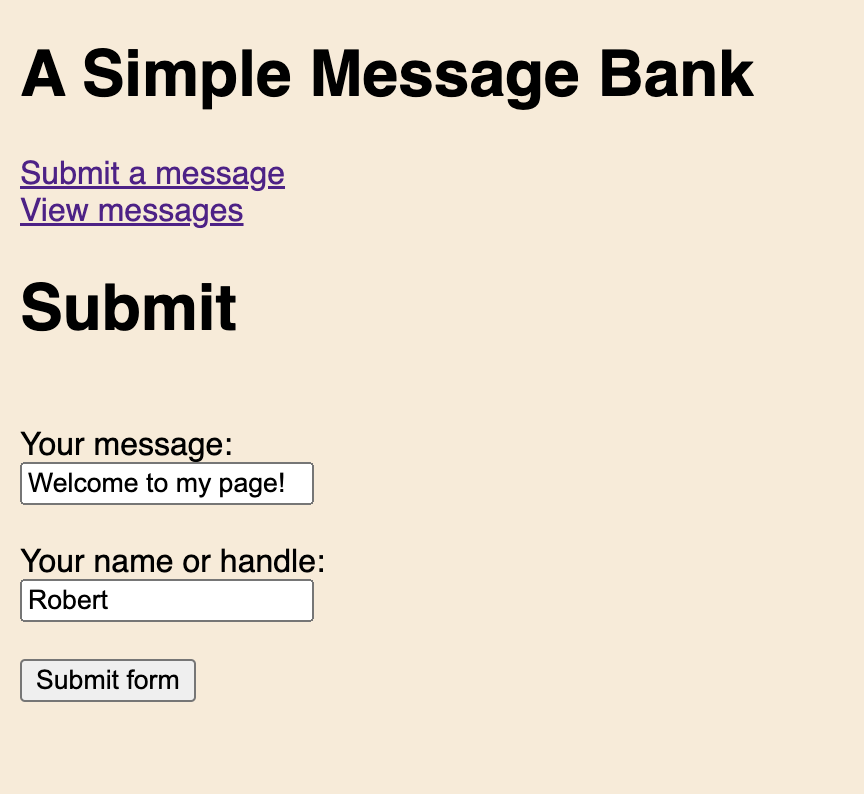

**View Page**
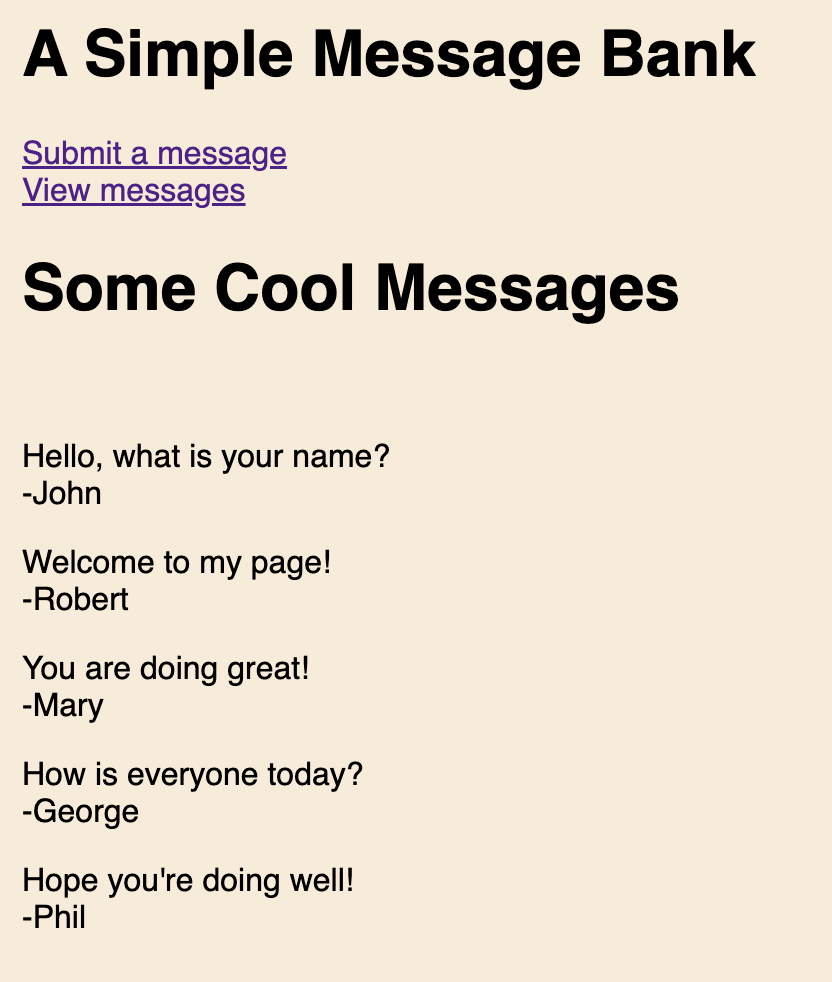